In [1]:
import numpy as np
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import load_model

def preprocess_image(image_path):
    image = Image.open(image_path)
    
    gray_image = image.convert("L")

    enhancer = ImageEnhance.Sharpness(gray_image)
    sharp_image = enhancer.enhance(2.0)

    resized_image = sharp_image.resize((256, 256), Image.LANCZOS)

    enhancer = ImageEnhance.Sharpness(resized_image)
    final_image = enhancer.enhance(1.5)

    final_image_rgb = np.stack([np.array(final_image)] * 3, axis=-1)  
    
    return final_image_rgb

def predict_new_image(model, image_path):
    image_array = preprocess_image(image_path) / 255.0  
    image_array = np.expand_dims(image_array, axis=0)  

    prediction = model.predict(image_array)

    predicted_class = 1 if prediction >= 0.5 else 0 
    probability = prediction[0][0] 
    
    return predicted_class, probability

def predict_single_image(model, image_path, class_names):
    predicted_class, probability = predict_new_image(model, image_path)
    
    predicted_class_name = class_names[predicted_class]
    
    print(f"Image: {image_path}, Predicted Class: {predicted_class_name}, Probability: {probability:.4f}")            
    
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f"Predicted Class: {predicted_class_name}")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Image: test1.png, Predicted Class: Medical Care Form, Probability: 0.0000


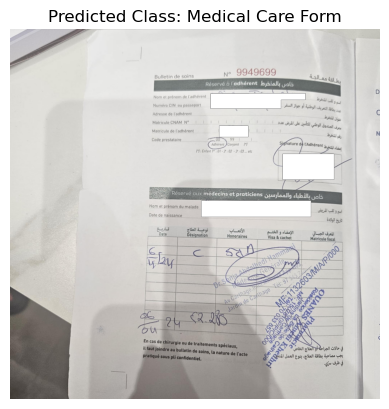

In [6]:
image_path = 'test1.png'
class_names = ["Medical Care Form", "Prescription"] 
model = load_model("CNN_model.h5") 
predict_single_image(model, image_path, class_names)

In [7]:
def split_image(image_path):
    single_page_dir = 'singlePage'
    split_pages_dir = 'SplitPages'
    
    os.makedirs(single_page_dir, exist_ok=True)
    os.makedirs(split_pages_dir, exist_ok=True)
    
    img = Image.open(image_path)
    
    width, height = img.size
    
    base_name = os.path.splitext(os.path.basename(image_path))[0]
    file_extension = os.path.splitext(image_path)[1]
    
    if width > height * 1.3:
        left = img.crop((0, 0, width // 2, height))
        right = img.crop((width // 2, 0, width, height))
        
        left.save(os.path.join(split_pages_dir, f"{base_name}_left{file_extension}"))
        right.save(os.path.join(split_pages_dir, f"{base_name}_right{file_extension}"))
        
        print(f"Image split into two pages: {base_name}_left{file_extension}, {base_name}_right{file_extension}")
    else:
        img.save(os.path.join(single_page_dir, f"{base_name}{file_extension}"))
        print(f"Image is single-page: {base_name}{file_extension}")


In [4]:
split_image(image_path)

Image is single-page: test.jpg
